<IPython.core.display.Javascript object>


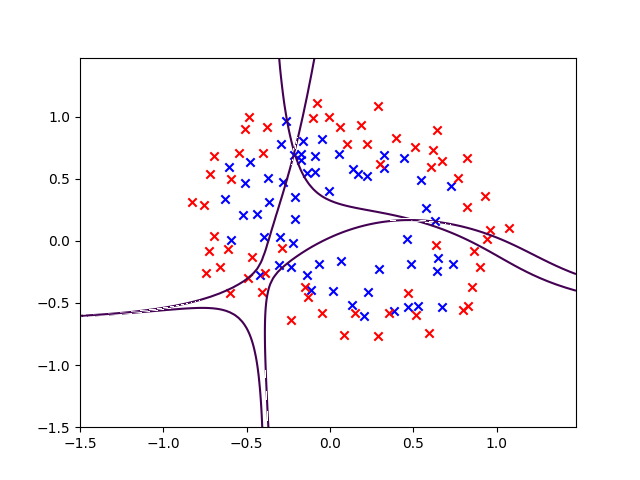

Cost at start:  1.117774044035552


In [ ]:
%matplotlib notebook
# import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy
import time
# import sympy

start = time.time()

a = 0.07
l = 0.01

df = pd.read_csv("ex2data2.txt", header=None)

fig = plt.figure()
al = fig.add_subplot(111)
# plt.ion()
# fig, al = plt.subplots()
delta = 0.025
xrange = np.arange(-1.5, 1.5, delta)
yrange = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xrange,yrange)

x = list()
xmax = 1

for row in df.iterrows():
	x1 = row[1][0]/xmax
	x2 = row[1][1]/xmax
	xarr = [x1, x2, x1*x2, x1**2, x2**2, x1**3, x2**3, (x1**3)*(x2**3)]
	x.append(xarr)

x = np.array([np.array(xi) for xi in x])
y = df[2].to_numpy()


jn = len(xarr)
w = np.array([1]*jn)
b = 0

# print(x)


def getz(w, b, xi):
	z = np.dot(w, xi) + b
	return z

def model(w, b, xi):
	z = getz(w, b, xi)
	f = 1/(1 + (math.e**(-z)))
	return f

def cost_func(w, b):
	cost = 0	
	for i in range(0, len(x)):
		yhat = model(w, b, x[i])
		yi = y[i]
		costpart = ((-1)*(yi)*(math.log(yhat))) - ((1-yi)*(math.log(1-yhat)))
		cost = cost + costpart
	cost = cost/len(x)
	regcost = 0
	for j in range(0, jn):
		regcost = regcost + (l*(w[j]**2))
	regcost = regcost/(2*len(x))
	cost = cost + regcost
	return cost

		
def grad_desc():
	global w
	global b
	global jn
	d = [0]*jn
	bd = 0
	for i in range(0, len(x)):
		#print("descending")
		yhat = model(w, b, x[i])
		#print(yhat)
		#print(y[i])
		for j in range(0, jn):
			# print(i, j)
			d[j] = d[j] + ((yhat - y[i])*(x[i][j])) + (l*w[j])
		bd = bd + (yhat - y[i])
	d = np.array(d)
	d = d/len(x)
	w = w - (a*d[0:jn])
	b = b - (a*bd)
	F = (w[0]*X) + (w[1]*Y) + (w[2]*X*Y) + (w[3]*(X**2)) + (w[4]*(Y**2)) + (w[5]*(X**3)) + (w[6]*(Y**3)) + (w[7]*((X**3)*(Y**3))) + b # (w[5]*(X**3)) + (w[5]*(Y**3)) + 
	# plt.cla()
	al.clear()
	# display.clear_output(wait = True)
	al.scatter(df[df[2]==1][0], df[df[2]==1][1], color = 'blue', marker='x')
	al.scatter(df[df[2]==0][0], df[df[2]==0][1], color = 'red', marker='x')
	al.contour(X, Y, F, [0])
	# display.display(plt.gcf())
	fig.canvas.draw()
	fig.show()
# 	time.sleep(1/(22*1000000000000))
	# print(d)
	# print(w)
	# print(b)

fig.show()
# fig.canvas.draw()

costs = list()
costs.append(cost_func(w,b))
# print()
print("Cost at start: ", costs[0])
while len(costs)<10000:

	prevw = copy.deepcopy(w)
	prevb = copy.deepcopy(b)
	grad_desc()
	cost = cost_func(w, b)
	costs.append(cost)
	# print(cost)
	i = len(costs) - 1
	if i % 1000 == 0:
		print(f"Cost at iteration {i}: ", costs[-1])

	if cost == costs[-2]:
		print(f"No change in cost at iteration {i}: ({cost})")
		break
	if abs(cost) > abs(costs[-2]):
		print(f"Cost increased at iteration {i}: ({cost} > {costs[-2]})")
		w = prevw
		b = prevb
		break


end = time.time()
print()
print("Time taken: ", end - start)	
print()

print(w)
print(b)



plt.plot(np.arange(0, len(costs)), costs)
plt.show()


# fig, al = plt.subplots()
# al.scatter(df[df[2]==1][0], df[df[2]==1][1], color = 'blue', marker='x')
# al.scatter(df[df[2]==0][0], df[df[2]==0][1], color = 'red', marker='x')

# plt.show()
# al.plot([(-b/w[0])*xmax, 0], [0, (-b/w[1])*xmax], color = 'black')


# x1 = np.arange(-1.5, 1.5, 0.0001)
# x1tmp = copy.deepcopy(x1)
# x2 = list()
# delnum = 0
# for i in range(0, len(x1)):
# 	x2s =  (-b-(w[0]*(x1[i]**2)))/w[1]
# 	if x2s >= 0:
# 		x2.append(math.sqrt(x2s))
# 	else:
# 		delnum = delnum + 1
# 		x1tmp = np.delete(x1tmp, i-delnum)

# x1 = x1tmp
# x2 = np.array(x2)
# al.plot(x1, x2, color = 'black')
# al.plot(x1, -1*x2, color = 'black')



# al.set_xlim(0, xmax)
# al.set_ylim(0, xmax)
# sympy.var('x y')
# sympy.plot_implicit((w[0]*x) + (w[1]*y) + (w[2]*(x**2)) + (w[3]*(y**2)) + (w[4]*(x*y)))


# plt.show()

# delta = 0.025
# fig, al = plt.subplots()
# al.scatter(df[df[2]==1][0], df[df[2]==1][1], color = 'blue', marker='x')
# al.scatter(df[df[2]==0][0], df[df[2]==0][1], color = 'red', marker='x')
# x_range = np.arange(-5, 20, delta)
# y_range = np.arange(-5, 20, delta)

# X, Y = np.meshgrid(x_range,y_range)
# al.set_xlim(-2,1)
# al.set_ylim(-2,1)
# F = (w[0]*X) + (w[1]*Y) + (w[2]*(X**2)) + (w[3]*(Y**2)) + (w[4]*(X*Y)) + b
# al.contour(F, [0])
# plt.show()



# w = np.array([0.83335924, 0.85726968, 0.8618935,  0.85944093, 0.93178418])
# F is one side of the equation, G is the other





while True:
	print()
	s1 = input("Score 1: ")
	if s1=="":
		break
	else:
		s1 = float(s1)
	s2 = input("Score 2: ")
	if s2 == "":
		continue
	else:
		s2 = float(s2)

	f = model(w, b, np.array([s1/xmax, s2/xmax]))
	print(f)
	if f>0.5:
		print("Yes")
	elif f<0.5:
		print("No")
	else:
		print("?")
